In [2]:
import pyccl as ccl
print(f"I am using pyccl version {ccl.__version__}")
import numpy as np
import matplotlib.pyplot as plt
from scripts.presets import Presets
from scripts.data_vectors import DataVectors
from scripts.data_vector_metrics import DataVectorMetrics
from scripts.power_spectra_analysis import PowerSpectraAnalysis
import time
import seaborn as sns
import cmasher as cmr


I am using pyccl version 3.0.2


In [3]:
# Step 1: Initialize your Presets object
forecast_year = "10"  # or whatever forecast year you want to use
presets = Presets(forecast_year=forecast_year, should_save_data=False)

# Step 2: Create an instance of PowerSpectraAnalysis with the Presets object
analysis = PowerSpectraAnalysis(presets)


### Step 3: Generate and save the fiducial spectra

In [3]:
%%time
#analysis.compute_fiducial_spectra()


Fiducial spectra saved.
CPU times: user 12 s, sys: 1.8 s, total: 13.8 s
Wall time: 3.42 s


### Step 4: Compute the ell sweep power spectra
This generates and saves spectra as a function of ell values.
Adjust num_ell_values as needed (we are doign the default setting)

In [4]:
%%time
#analysis.compute_cls_ell_sweep(num_ell_values=50)  


CPU times: user 9 μs, sys: 2 μs, total: 11 μs
Wall time: 28.8 μs


### Step 5: Compute the redshift sweep (z sweep) power spectra
This generates and saves spectra over a range of z_max and z_resolution values.
The values there are the default ones.

In [6]:
%%time
# problematic zmax 3.3 zres 350 
# this usually starts from 3.0 but now testing wtf is going on
zet_max_range = np.arange(3.0, 4.1, 0.1)
zet_res_range = np.arange(300, 10050, 50)
#analysis.compute_cls_zres_and_zmax(zet_max_range, zet_res_range)


CPU times: user 104 μs, sys: 73 μs, total: 177 μs
Wall time: 131 μs


### Step 6: Compute the ell sweep distance metric
This calculates and saves the delta metric using the ell sweep spectra compared to the fiducial spectra.

In [7]:
%%time

ell_sweep = analysis.compute_distance_metric_ell_sweep(num_ell_values=50)


Loaded fiducial spectra for chi-squared reference
Processed ell=20 with delta chi-squared: 0.0
Processed ell=21 with delta chi-squared: 2481.6929331843526
Processed ell=24 with delta chi-squared: 52256.25176284106
Processed ell=26 with delta chi-squared: 140706.1433131618
Processed ell=29 with delta chi-squared: 406897.2504012182
Processed ell=31 with delta chi-squared: 705705.9566099336
Processed ell=35 with delta chi-squared: 1676827.934024545
Processed ell=38 with delta chi-squared: 2785465.6537319254
Processed ell=42 with delta chi-squared: 4770428.503388821
Processed ell=46 with delta chi-squared: 7273118.552975259
Processed ell=51 with delta chi-squared: 11018085.04178586
Processed ell=56 with delta chi-squared: 15235585.200563893
Processed ell=61 with delta chi-squared: 19768838.977072295
Processed ell=67 with delta chi-squared: 25489571.079082493
Processed ell=74 with delta chi-squared: 32177857.074684147
Processed ell=81 with delta chi-squared: 38473141.330812864
Processed ell

In [8]:
ell_sweep

array([0.00000000e+00, 2.48169293e+03, 5.22562518e+04, 1.40706143e+05,
       4.06897250e+05, 7.05705957e+05, 1.67682793e+06, 2.78546565e+06,
       4.77042850e+06, 7.27311855e+06, 1.10180850e+07, 1.52355852e+07,
       1.97688390e+07, 2.54895711e+07, 3.21778571e+07, 3.84731413e+07,
       4.49576586e+07, 5.13962334e+07, 5.77176379e+07, 6.39128075e+07,
       6.99575757e+07, 7.53761694e+07, 8.13880455e+07, 8.66653933e+07,
       9.18857097e+07, 9.69139461e+07, 1.01654588e+08, 1.05873939e+08,
       1.09926257e+08, 1.13724848e+08, 1.17118921e+08, 1.20228463e+08,
       1.23047499e+08, 1.25643678e+08, 1.28003964e+08, 1.30130693e+08,
       1.32068910e+08, 1.33818018e+08, 1.35408816e+08, 1.36842616e+08,
       1.38142676e+08, 1.39312159e+08, 1.40379774e+08, 1.41344801e+08,
       1.42225509e+08, 1.43015498e+08, 1.43730883e+08, 1.44382244e+08,
       1.44970192e+08, 1.45506005e+08])

### Step 7: Compute the z sweep distance metric
This calculates and saves the delta metric using the z sweep spectra compared to the fiducial spectra.

In [9]:
%%time
z_sweep = analysis.compute_distance_metric_redshift_sweep(zet_max_range, zet_res_range)


Loaded fiducial spectra from:
data_output/spectra_sweep/spectra_y10/fiducial/cl_gc_fiducial_y10.npy
data_output/spectra_sweep/spectra_y10/fiducial/cl_ggl_fiducial_y10.npy
data_output/spectra_sweep/spectra_y10/fiducial/cl_cs_fiducial_y10.npy
Processing zmax=3.0
Processing zmax=3.1
Processing zmax=3.2
Processing zmax=3.3
Processing zmax=3.4
Processing zmax=3.5
Processing zmax=3.6
Processing zmax=3.7
Processing zmax=3.8
Processing zmax=3.9
Processing zmax=4.0
Saved delta results for zres and zmax sweep: data_output/metric/zscan/delta_sweep_zres_zmax_y10.npy
CPU times: user 8.98 s, sys: 1.5 s, total: 10.5 s
Wall time: 14.5 s


In [10]:
zmetric_path = "data_output/metric/zscan/"

z_sweep_metric_y1 = np.load(f"{zmetric_path}delta_sweep_zres_zmax_y1.npy")
z_sweep_metric_y10 = np.load(f"{zmetric_path}delta_sweep_zres_zmax_y10.npy")


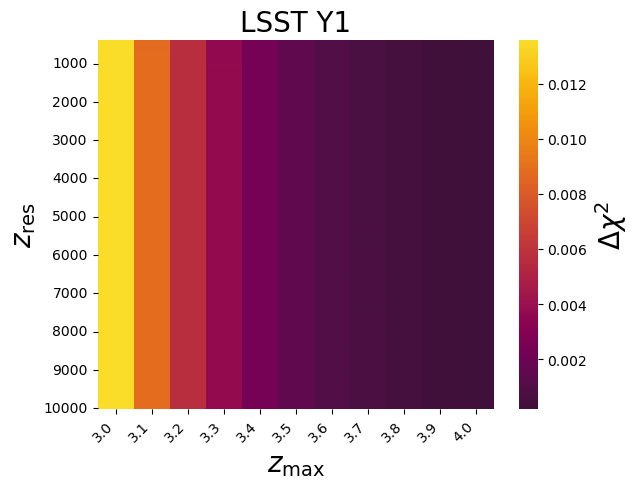

In [30]:
# Set up parameters
fontsize = 20

# Create colormap
cmap = cmr.get_sub_cmap('cmr.pride_r', 0.05, 0.5)

# Create figure and axis
fig, ax = plt.subplots()

# Plot heatmap
sns.heatmap(z_sweep_metric_y1.T, cmap=cmap, ax=ax, linecolor="white")

# Set axis labels with fontsize
ax.set_xlabel(r"$z_\mathrm{max}$", fontsize=fontsize)
ax.set_ylabel(r"$z_\mathrm{res}$", fontsize=fontsize)

# Set appropriate tick labels for zmax
zmax_values = np.arange(3.0, 4.1, 0.1)  # zmax range
ax.set_xticks(np.arange(len(zmax_values)) + 0.5)  # Center ticks on heatmap cells
ax.set_xticklabels([f"{z:.1f}" for z in zmax_values], rotation=45, ha='right', fontsize=10)

# Set reduced tick labels for zres
zres_values = np.arange(400, 10050, 50)  # zres range
major_zres_indices = [i for i, z in enumerate(zres_values) if z % 1000 == 0]  # Major tick indices
major_zres_labels = [zres_values[i] for i in major_zres_indices]  # Corresponding values

ax.set_yticks(np.array(major_zres_indices) + 0.5)  # Adjust tick positions for heatmap
ax.set_yticklabels([f"{z}" for z in major_zres_labels], fontsize=10)

# Add colorbar and set label
cbar = ax.collections[0].colorbar
cbar.set_label(r'$\Delta\chi^2$', fontsize=fontsize)

plt.title("LSST Y1", fontsize=fontsize)
# Save figure
plt.savefig("./plots_output/chi2_zscan_metric_y1.pdf")
plt.savefig("./plots_output/chi2_zscan_metric_y1.png")


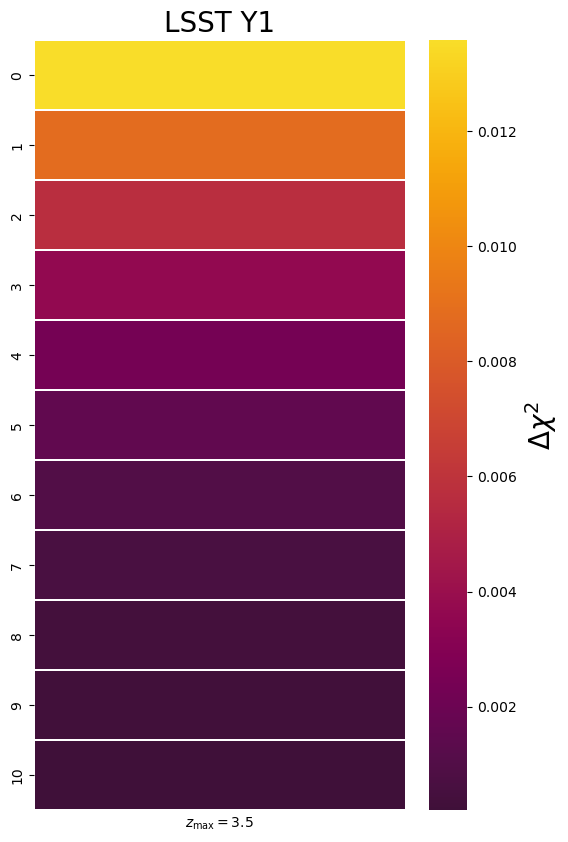

In [26]:
# Select one specific zmax value
zmax_values = np.arange(3.0, 4.1, 0.1)  # All zmax values
zres_values = np.arange(400, 10050, 50)  # All zres values
selected_zmax = 3.5  # The zmax value you want to plot
zmax_index = np.argmin(np.abs(zmax_values - selected_zmax))  # Find the index of the closest zmax

# Extract the column corresponding to the selected zmax value
single_zmax_metric = z_sweep_metric_y1[:, zmax_index]  # Shape: (len(zres_values),)

# Reshape to plot as a heatmap (1D -> 2D)
single_zmax_metric_2d = single_zmax_metric.reshape(-1, 1)  # Shape: (len(zres_values), 1)

# Plot heatmap
fontsize = 20
cmap = cmr.get_sub_cmap('cmr.pride_r', 0.05, 0.5)

fig, ax = plt.subplots(figsize=(6, 10))  # Adjust the figure size for better visualization
sns.heatmap(single_zmax_metric_2d, cmap=cmap, ax=ax, cbar=True, linecolor="white", linewidths=0.1)

# Remove x-axis ticks and labels
ax.xaxis.set_ticks([])  # Remove ticks
ax.xaxis.set_ticklabels([])  # Remove tick labels
ax.set_xlabel(f"$z_{{\\mathrm{{max}}}} = {selected_zmax}$")  # Remove x-axis label

# Set y-axis ticks for main zres values
major_zres_indices = [i for i, z in enumerate(zres_values) if z % 500 == 0]  # Indices for major tick values
major_zres_labels = [zres_values[i] for i in major_zres_indices]  # Corresponding zres values

#ax.set_yticks(np.array(major_zres_indices) + 0.5)  # Align ticks with heatmap cells
#ax.set_yticklabels([f"{z}" for z in major_zres_labels], fontsize=5)  # Set main tick labels

# Add colorbar label
cbar = ax.collections[0].colorbar
cbar.set_label(r'$\Delta\chi^2$', fontsize=fontsize)

plt.title(f"LSST Y1", fontsize=fontsize)
plt.show()


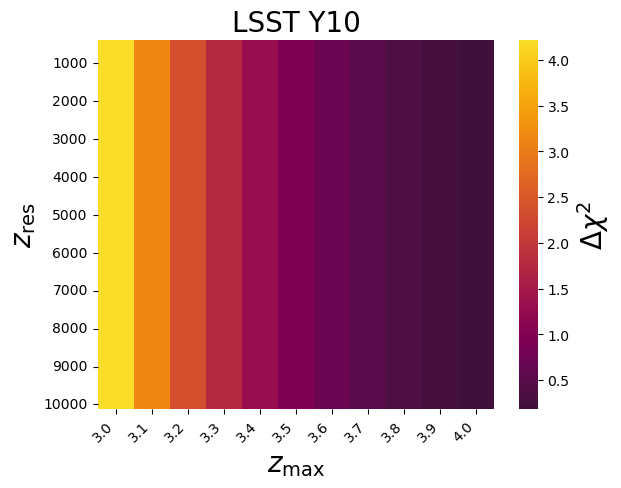

In [29]:
# Set up parameters
fontsize = 20

# Create colormap
cmap = cmr.get_sub_cmap('cmr.pride_r', 0.05, 0.5)

# Create figure and axis
fig, ax = plt.subplots()

# Plot heatmap
sns.heatmap(z_sweep_metric_y10.T, cmap=cmap, ax=ax)

# Set axis labels with fontsize
ax.set_xlabel(r"$z_\mathrm{max}$", fontsize=fontsize)
ax.set_ylabel(r"$z_\mathrm{res}$", fontsize=fontsize)

# Set appropriate tick labels for zmax
zmax_values = np.arange(3.0, 4.1, 0.1)  # zmax range
ax.set_xticks(np.arange(len(zmax_values)) + 0.5)  # Center ticks on heatmap cells
ax.set_xticklabels([f"{z:.1f}" for z in zmax_values], rotation=45, ha='right', fontsize=10)

# Set reduced tick labels for zres
zres_values = np.arange(400, 10050, 50)  # zres range
major_zres_indices = [i for i, z in enumerate(zres_values) if z % 1000 == 0]  # Major tick indices
major_zres_labels = [zres_values[i] for i in major_zres_indices]  # Corresponding values

ax.set_yticks(np.array(major_zres_indices) + 0.5)  # Adjust tick positions for heatmap
ax.set_yticklabels([f"{z}" for z in major_zres_labels], fontsize=10)

# Add colorbar and set label
cbar = ax.collections[0].colorbar
cbar.set_label(r'$\Delta\chi^2$', fontsize=fontsize)
plt.title("LSST Y10", fontsize=20)

# Save figure
plt.savefig("./plots_output/chi2_zscan_metric_y10.pdf")
plt.savefig("./plots_output/chi2_zscan_metric_y10.png")


In [15]:
ellmetric_path = "data_output/metric/ellscan/"

ell_sweep_metric_y1 = np.load(f"{ellmetric_path}delta_ell_sweep_y1.npy")
ell_sweep_metric_y10 = np.load(f"{ellmetric_path}delta_ell_sweep_y10.npy")
num_ell = 50
ells = np.geomspace(20. ,presets.ell_max, num_ell).astype(int)

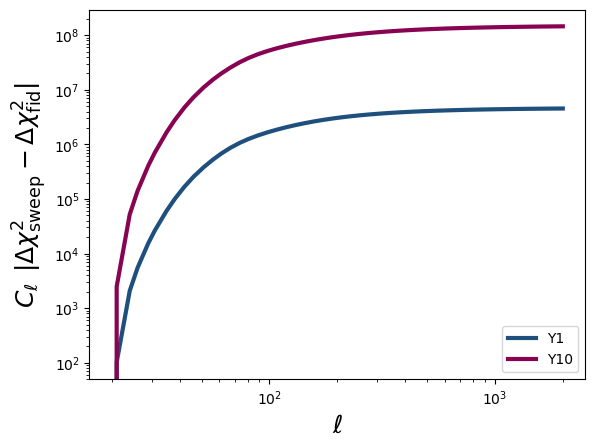

In [31]:
colors = cmr.take_cmap_colors('cmr.pride', 2, cmap_range=(0.15, 0.85))
plt.loglog(ells, ell_sweep_metric_y1, color=colors[0], lw=3, label="Y1")
plt.loglog(ells, ell_sweep_metric_y10, color=colors[1], lw=3, label="Y10")
plt.legend(loc=4)
plt.xlabel("$\\ell$", fontsize=18)
plt.ylabel(r"$C_\ell \:\: |\Delta\chi^2_{\mathrm{sweep}} - \Delta\chi^2_{\mathrm{fid}}|$", fontsize=18)

plt.savefig("./plots_output/chi2_ellscan_metric.pdf")
plt.savefig("./plots_output/chi2_ellscan_metric.png")

plt.show()